# ***Project name***

### **Importing library and the data set 'Loan'**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

df=pd.read_csv("/content/drive/MyDrive/loan.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Understanding

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
df.shape


(39717, 111)

In [29]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

In [31]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

### **Data cleaning**

checking the NULL values present in dataset

In [8]:
df.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,True,True,True,True,True,

In [35]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

As there are so many null values we will check NULL values in precentage 

In [9]:
df.isnull().sum()/len(df.index)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

There are many columns which have 100% null values. Firstly we will remove those columns

In [5]:
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 90]
print(missing_columns)
df = df.drop(missing_columns, axis=1)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [6]:
100*(df.isnull().sum()/len(df.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


There is columns 'desc' which has 32% null values 

In [12]:
df['desc'].head()


0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

As decs column contains the comments user gave while applying for the loan so this column would not be useful for our prediction.

In [7]:
df = df.drop(['desc'], axis=1)

The next column mths_since_last_delinq which has alomst 64% null values

In [6]:
df['mths_since_last_delinq'].head()

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

This column contains the "number of months since the borrower's last delinquency".for our prediction this column is also not needed.

In [8]:
df = df.drop(['mths_since_last_delinq'], axis=1)

In [9]:
100*(df.isnull().sum()/len(df.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

As more percentage null value colums are removed and remaing colums have  very less NULL values, we will check the columns with more than 10 null values.

In [9]:
df[df.isnull().sum(axis=1) > 5].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            39707, 39708, 39709, 39710, 39711, 39712, 39713, 39714, 39715,
            39716],
           dtype='int64', length=39717)

There are no columns which have  more then 10 null values.

"emp_length" column has integer data but it has some extra characters so we will convert it to int64 data type.

In [10]:
import re
df = df[~df['emp_length'].isnull()]
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


As our data cleaning is done, We will now move to Data analysis.

# **Data Analysis**


In the data set there are so many columns which are not useful for us in this prediction.
We onl need the info related to person applying for loan and its previous loan data.
Other than these fields we can ignore while analysis.


In [11]:
not_needed_fields= [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

df = df.drop(not_needed_fields, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  object 
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

Now,
our target variable - loan_status, We need to relabel the values - 0 or 1, 1 indicating that the person has defaulted and 0 for not.

In [12]:
df['loan_status'] = df['loan_status'].astype('category')


In [13]:
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))
df['loan_status'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    32145
1     5399
Name: loan_status, dtype: int64

Under analysis, we will first perform Univariate Analysis.

In [14]:

print(np.mean(df['loan_status']==1))
print(np.mean(df['loan_status']==0))


0.14380460259961644
0.8561953974003835


Plotting the bar graph for loan_status vs grade.which will give average default rates across categorical variables.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


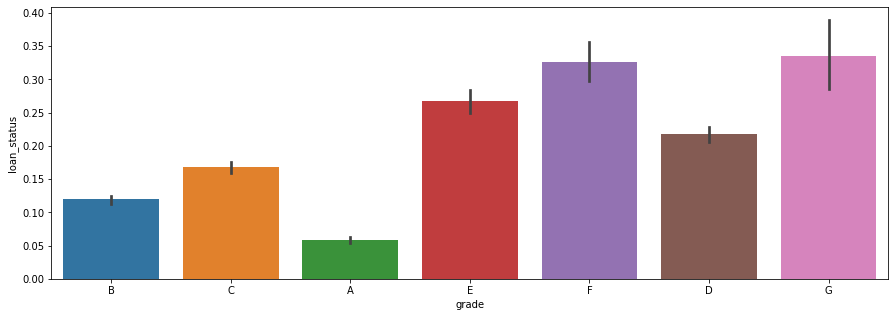

In [13]:
plt.figure(figsize=(15, 5))
sns.barplot(df.grade,df.loan_status)

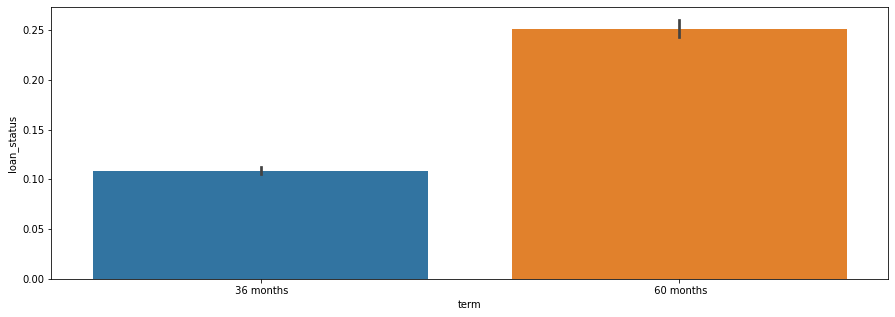

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(x='term', y='loan_status', data=df)

We can see there are more number of 60month defaulter than 36 month defaulter

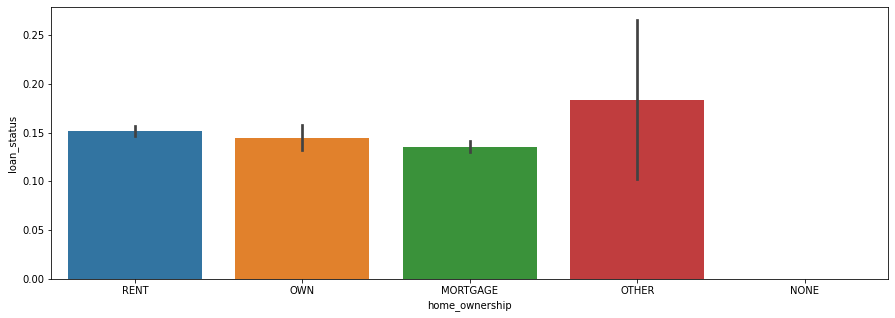

In [20]:
plt.figure(figsize=(15, 5))
sns.barplot(x='home_ownership', y='loan_status', data=df)

All three main catagories of house owners have probably same default rate.




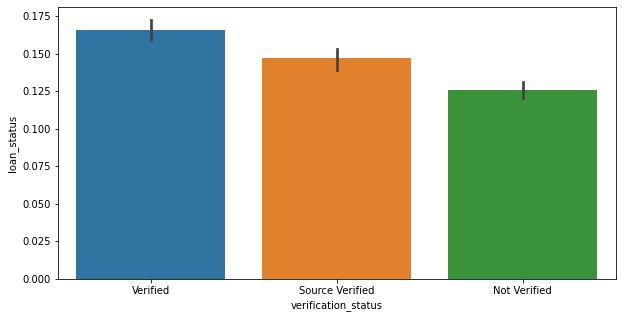

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(x='verification_status', y='loan_status', data=df)


As we can see number of defaults are more in verified loans rather than other two catagories.

### We will now see the trend of loan across years

In [23]:
df['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 37544, dtype: object

In [15]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]

We will now slice day, month and year from issue_d column using datetimeindex.

In [16]:
 import pandas as pd
 df['day']=pd.DatetimeIndex(df['issue_d']).day
 df['month']=pd.DatetimeIndex(df['issue_d']).month
 df['year']=pd.DatetimeIndex(df['issue_d']).year
 

In [17]:
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

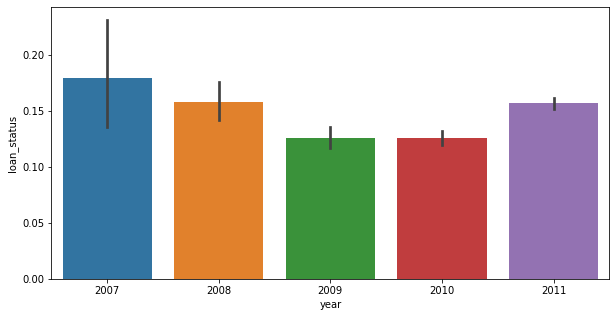

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='loan_status', data=df)


The default rate has incresed in 2011.

## We will now analysize how default rate are varing as the loan amount changes.

In [40]:
df['loan_amnt']

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 37544, dtype: int64

As there is wide range of loan amount to make it easier we will make the catagories of loan amount funded into high, medium and low.

In [19]:
def loan_catagory(x):
  if x <5000:
    return 'Low'
  if x >= 5000 and x < 15000:
    return 'Medium'
  if x >= 15000 and x < 25000:
    return 'High'
  else:
    return 'Very High'

df['loan_amnt']=df['loan_amnt'].apply(lambda x : loan_catagory(x))


In [20]:
df['loan_amnt'].value_counts()

Medium       20157
High          7572
Low           7095
Very High     2720
Name: loan_amnt, dtype: int64

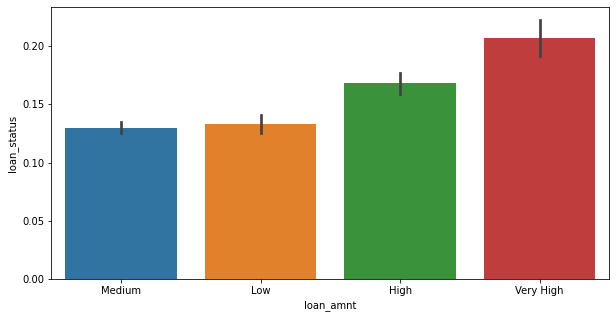

In [63]:
plt.figure(figsize=(10, 5))
sns.barplot(x='loan_amnt', y='loan_status', data=df)

From this graph we can see if the amount of granted loan is more the percentage of defaulters are more.

In [64]:
  df['funded_amnt_inv']

0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 37544, dtype: float64

Loan investe amount is also converted to four different catagories.

In [21]:
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_catagory(x))

In [29]:
  df['funded_amnt_inv']

0           Low
1           Low
2           Low
3        Medium
5        Medium
          ...  
39712       Low
39713       Low
39714       Low
39715       Low
39716       Low
Name: funded_amnt_inv, Length: 37544, dtype: object

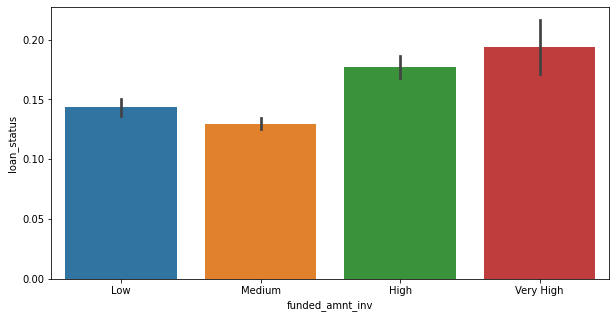

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(x='funded_amnt_inv', y='loan_status', data=df)

Default rate is increasing as investe amount is increasing.

In [30]:
df['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 37544, dtype: object

In [22]:
df['int_rate'] = df['int_rate'].apply(lambda x : x.replace('%' , ' ') if x[-1] == '%' else 0)
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x))

In [23]:
df['int_rate']


0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 37544, dtype: float64

In [24]:
def int_cat(x):
    if x <= 10:
        return 'low'
    elif x > 10 and x <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_cat(x))


In [34]:
df['int_rate']

0        medium
1          high
2          high
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: int_rate, Length: 37544, dtype: object

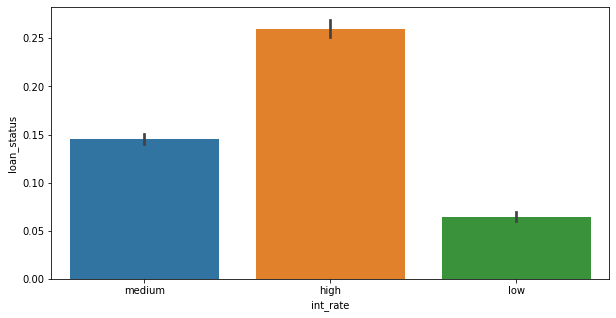

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(x='int_rate', y='loan_status', data=df)

As the interest rate increases default rate increases.

In [25]:
def funded_amount(n):
   if n <= 5000:
       return 'low'
   elif n > 5000 and n <=15000:
       return 'medium'
   else:
      return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

In [37]:
df['funded_amnt']

0           low
1           low
2           low
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: funded_amnt, Length: 37544, dtype: object

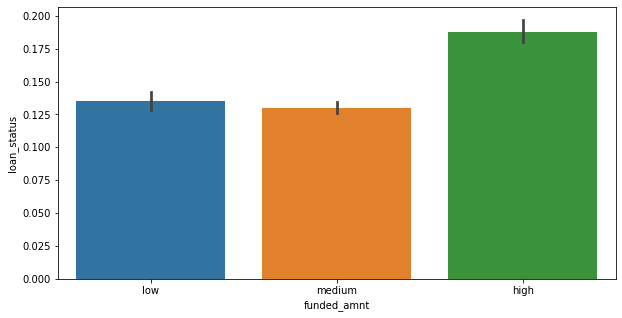

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(x='funded_amnt', y='loan_status', data=df)

high default rate for high funded amont.

In [26]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

In [40]:
df['annual_inc']

0              low
1              low
2              low
3              low
5              low
           ...    
39712         high
39713          low
39714       medium
39715    very high
39716          low
Name: annual_inc, Length: 37544, dtype: object

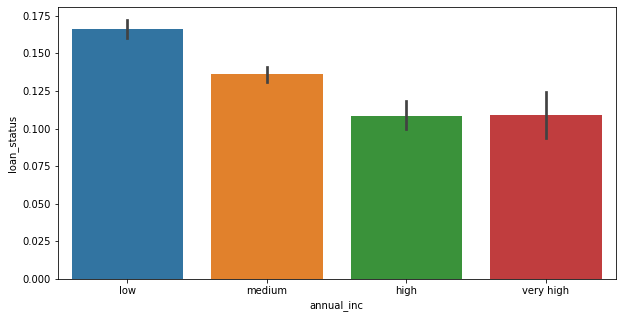

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(x='annual_inc', y='loan_status', data=df)

People who has less annual income are tend to be more defaulter.

In [42]:
df['purpose']

0               credit_card
1                       car
2            small_business
3                     other
5                   wedding
                ...        
39712      home_improvement
39713           credit_card
39714    debt_consolidation
39715                 other
39716    debt_consolidation
Name: purpose, Length: 37544, dtype: object

As we have data of purpose for applying loan we can catagorize them.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

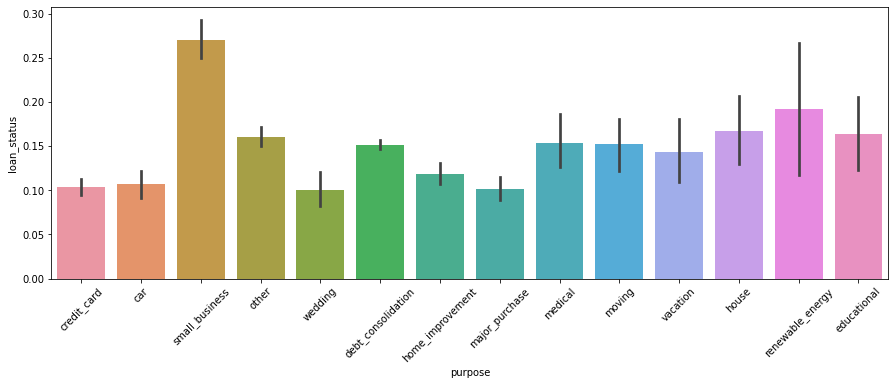

In [27]:
plt.figure(figsize=(15, 5))
sns.barplot(x='purpose', y='loan_status', data=df)
plt.xticks(rotation=45)

Default rate of small business are more compared to others.

## We will now select top 3 default rate purposes and will plot their countplot so that we can catagorize them term wise.

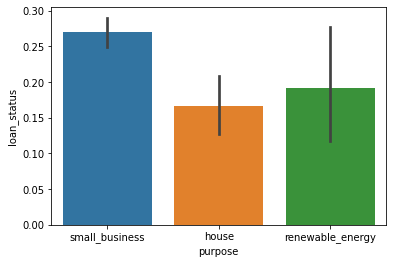

In [31]:
main_purposes = ["small_business","renewable_energy","house"]
df = df[df['purpose'].isin(main_purposes)]
sns.barplot(x=df['purpose'],y=df['loan_status'],data=df)

We will now analyse the purpose of loan according to term.

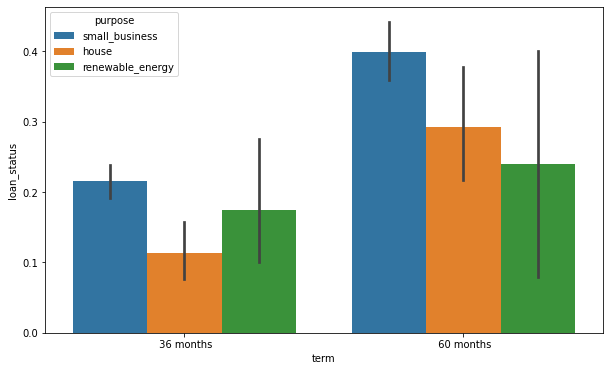

In [33]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)


Pltting the graph of loan_staus and purpose vs grade.

Along with graphical representation we are calculating default rate in numbers.


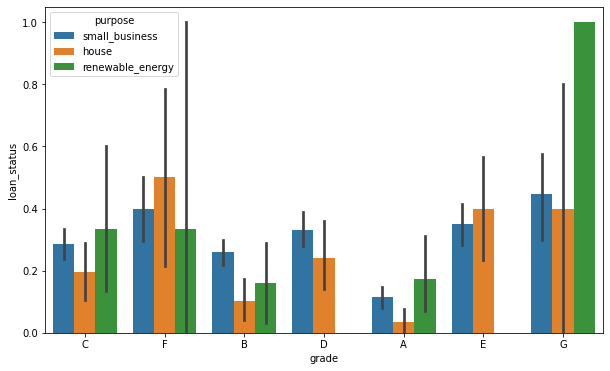

In [35]:
plt.figure(figsize=[10, 6])
sns.barplot(x='grade', y="loan_status", hue='purpose', data=df)

In [45]:
df.groupby('grade').loan_status.mean().sort_values(ascending=False)

grade
G    0.462963
F    0.409524
E    0.350000
D    0.309735
C    0.272947
B    0.226481
A    0.101770
Name: loan_status, dtype: float64

Pltting the graph of loan_staus and purpose vs year.

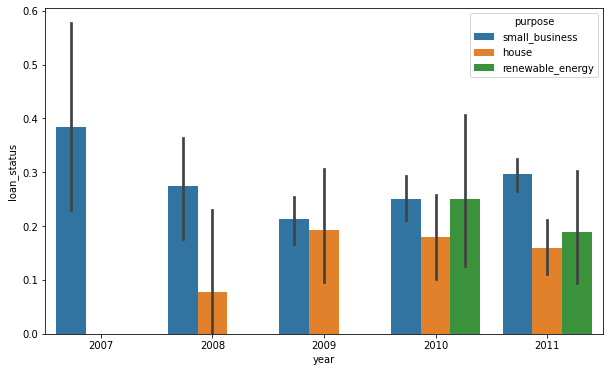

In [36]:
plt.figure(figsize=[10, 6])
sns.barplot(x='year', y="loan_status", hue='purpose', data=df)

In [44]:
df.groupby('year').loan_status.mean().sort_values(ascending=False)

year
2007    0.370370
2011    0.267568
2008    0.242991
2010    0.238636
2009    0.207254
Name: loan_status, dtype: float64

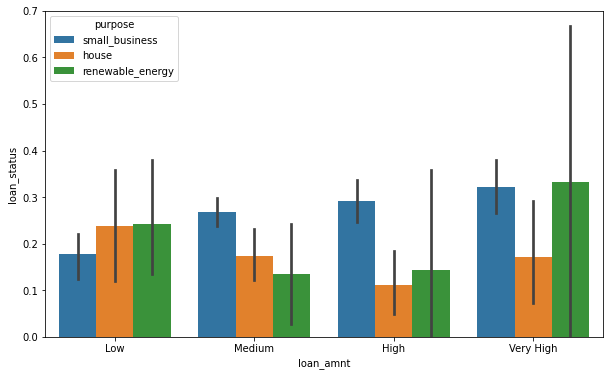

In [37]:
plt.figure(figsize=[10, 6])
sns.barplot(x='loan_amnt', y="loan_status", hue='purpose', data=df)

In [43]:
df.groupby('loan_amnt').loan_status.mean().sort_values(ascending=False)

loan_amnt
Very High    0.301887
High         0.258197
Medium       0.246418
Low          0.193443
Name: loan_status, dtype: float64

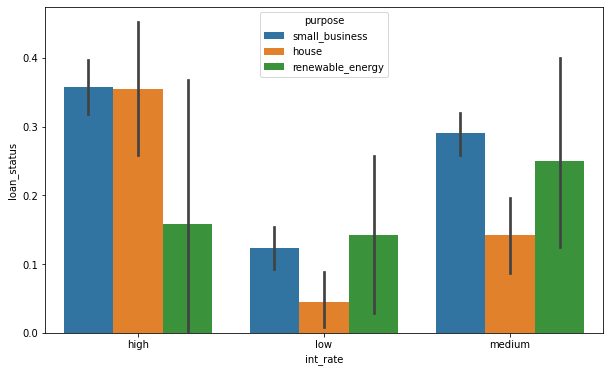

In [38]:
plt.figure(figsize=[10, 6])
sns.barplot(x='int_rate', y="loan_status", hue='purpose', data=df)

In [42]:
df.groupby('int_rate').loan_status.mean().sort_values(ascending=False)

int_rate
high      0.350850
medium    0.265111
low       0.109155
Name: loan_status, dtype: float64

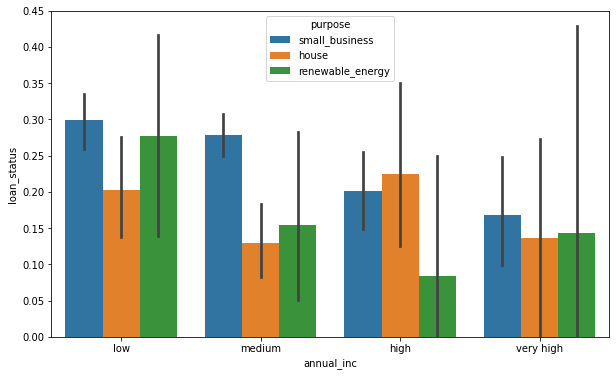

In [40]:
plt.figure(figsize=[10, 6])
sns.barplot(x='annual_inc', y="loan_status", hue='purpose', data=df)

In [41]:
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.282842
medium       0.249511
high         0.200000
very high    0.161538
Name: loan_status, dtype: float64

As we have seen how default rate is varing accross differnt catagories.

So, thats how we have analysed the loan data and plotted the bar graph of default rate  accross other related variables.